# Experiment: Water Management Strategies

Water Management is a complex topic. It involves many different actors, from the government to the private sector, and many different strategies, from water pricing to water reuse. In this experiment, we will explore the different strategies that countries have adopted to manage their water resources.

Especially, Waste Water Treatment and Reuse are important topics.

In [183]:
import os
import sys

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

from src.aquastat_utils import *

# Import AQUASTAT
aquastat_df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
C:\Users\simon\DataspellProjects\team-acqua\src\..\dat\fao_aquastat.csv already exists.
Renaming countries ...


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from tueplots import bundles
import scipy.stats as stats


plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 300})

In [185]:
'''Define colormaps'''

# Define the colors for 'bad', 'okay', and 'good'
rog = [(0.0, 'green'),  # Good
       (0.5, 'orange'),  # Okay
       (1.0, 'red')]  # Bad
rog_cmap = LinearSegmentedColormap.from_list('rog', rog)

# Wastewater CMAP
wastewater = {
    'red':   ((0.0, 0.0, 0.0),   # Dark blue for good quality
              (0.5, 0.5, 0.5),   # Grey for treated/acceptable
              (1.0, 0.5, 0.5)),  # Brown/red for polluted

    'green': ((0.0, 0.0, 0.0),
              (0.5, 0.5, 0.5),
              (1.0, 0.0, 0.0)),

    'blue':  ((0.0, 0.3, 0.3),   # Keeping blue a bit higher for the middle range
              (0.5, 0.5, 0.5),
              (1.0, 0.0, 0.0))
}

# Create the colormap using the dictionary
wastewater_cmap = LinearSegmentedColormap('waste', segmentdata=wastewater, N=256)

In [186]:
'''Filter variables that are correlated with water management'''
filter_for = ['waste', 'reuse', 'treatment']  # variables interesting for waste water treatment

filtered_columns = [column for column in aquastat_df.columns if any([x in column.lower() for x in filter_for])]
filtered_columns

['% of area equipped for irrigation by direct use of  treated municipal wastewater',
 '% of area equipped for irrigation by direct use of non-treated municipal wastewater',
 'Area equipped for irrigation by direct use of non-treated municipal wastewater ',
 'Area equipped for irrigation by direct use of not treated municipal wastewater',
 'Area equipped for irrigation by direct use of treated municipal wastewater',
 'Capacity of the municipal wastewater treatment facilities',
 'Collected municipal wastewater',
 'Direct use of not treated municipal wastewater for irrigation purposes',
 'Direct use of treated municipal wastewater',
 'Direct use of treated municipal wastewater for irrigation purposes',
 'Not treated municipal wastewater',
 'Not treated municipal wastewater discharged (secondary water)',
 'Number of municipal wastewater treatment facilities',
 'Produced municipal wastewater',
 'Treated municipal wastewater',
 'Treated municipal wastewater discharged (secondary water)']

We now have a list of variables related to waste water and treatment. Let's explore them.

In [187]:
# Get for each country the number of municipal wastewater treatment facilities

# Create a new dataframe with only the columns we are interested in
interesting_var = 'Number of municipal wastewater treatment facilities'

waste_df = aquastat_df[['Country', 'Year', interesting_var]]
waste_df = waste_df.dropna()  # Drop rows with missing values
waste_df = waste_df.sort_values(by=interesting_var, ascending=False)  # Sort by number of facilities

waste_df

Variable                   Country  Year  \
10127     United States of America  2004   
10126     United States of America  2003   
10125     United States of America  2002   
10124     United States of America  2001   
10123     United States of America  2000   
...                            ...   ...   
9710                  Turkmenistan  2015   
9711                  Turkmenistan  2016   
9712                  Turkmenistan  2017   
9713                  Turkmenistan  2018   
98                         Albania  2005   

Variable  Number of municipal wastewater treatment facilities  
10127                                               16583.0    
10126                                               16501.0    
10125                                               16419.0    
10124                                               16337.0    
10123                                               16255.0    
...                                                     ...    
9710                                                    1.0    
9711                                                    1.0    
9712                                                    1.0    
9713                                                    1.0    
98                                                      1.0    

[1481 rows x 3 columns]

The total number is not very interesting to us so lets look at facilities per capita.
We dont want to look at to small numbers so per 1000 people seems appropriate

In [188]:
'''Get facilities per n citizens'''
waste_df['Total population'] = aquastat_df['Total population']
n = 1000
waste_df[f'{interesting_var} per {n} citizens'] = (waste_df[interesting_var] / (
        waste_df['Total population'] * 1000)) * n
waste_df

Variable                   Country  Year  \
10127     United States of America  2004   
10126     United States of America  2003   
10125     United States of America  2002   
10124     United States of America  2001   
10123     United States of America  2000   
...                            ...   ...   
9710                  Turkmenistan  2015   
9711                  Turkmenistan  2016   
9712                  Turkmenistan  2017   
9713                  Turkmenistan  2018   
98                         Albania  2005   

Variable  Number of municipal wastewater treatment facilities  \
10127                                               16583.0     
10126                                               16501.0     
10125                                               16419.0     
10124                                               16337.0     
10123                                               16255.0     
...                                                     ...     
9710                                                    1.0     
9711                                                    1.0     
9712                                                    1.0     
9713                                                    1.0     
98                                                      1.0     

Variable  Total population  \
10127           292354.658   
10126           289815.562   
10125           287279.318   
10124           284607.993   
10123           281710.909   
...                    ...   
9710              5565.287   
9711              5662.368   
9712              5757.667   
9713              5850.901   
98                3086.810   

Variable  Number of municipal wastewater treatment facilities per 1000 citizens  
10127                                              0.056722                      
10126                                              0.056936                      
10125                                              0.057153                      
10124                                              0.057402                      
10123                                              0.057701                      
...                                                     ...                      
9710                                               0.000180                      
9711                                               0.000177                      
9712                                               0.000174                      
9713                                               0.000171                      
98                                                 0.000324                      

[1481 rows x 5 columns]

Plot the development of the number of facilities over time

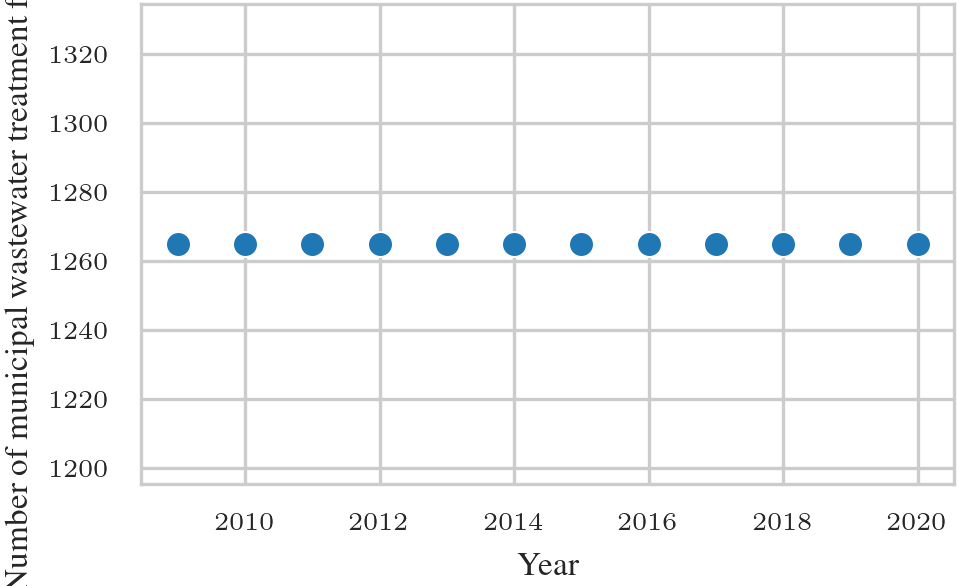

In [189]:
'''Just for testing'''
sns.scatterplot(data=waste_df[waste_df['Country'] == 'Canada'], x='Year',
                y='Number of municipal wastewater treatment facilities')
plt.show()

In [190]:

import geopandas as gpd
from src.utils import to_dat_path, save_fig


def get_growth_rate(series, log_scale=False):
    """
    Calculate the relative growth rate of a series.
    !! It only looks at the first and last value in series !!
    :param series: series to calculate relative growth rate for.
    :return: Relative growth rate.
    """
    y = series.values
    rate = ((y[-1] - y[0]) / y[0]) * 100
    if rate == 0:
        return 0

    # If log scale is true, use log10
    if log_scale:
        # If rate is negative, use -log10(-rate)
        if rate > 0:
            rate = math.log10(rate)
        # ... else use log10(rate)
        else:
            rate = -math.log10(-rate)
    return rate


def plot_growth_rates(
        data: pd.DataFrame,
        variable: str,
        cmap: str = 'cividis',
        title_var: str = None,
        log_scale: bool = False,
        fig=None,
        ax=None
):
    """
    Plot relative growth rates for a variable on a world map.
    :param data: Dataframe containing countries, years, and variables to plot.
    :param variable: Variable to plot.
    :param cmap: Preferred colormap for plotting. The default is 'cividis'.
    :param title_var: Preferred form of variable in title.
    :param log_scale: Whether to use a log scale for the growth rates.
    :param fig: Optional existing figure object to plot on.
    :param ax: Optional existing axes object to plot on.
    :return: fig, ax (matplotlib figure and axes objects)
    """

    font_size = 15

    '''Get Rates'''
    # Pivot the DataFrame to have years as the index and countries as columns
    df_pivot = data.pivot(index='Year', columns='Country', values=variable).dropna()
    # Apply the function to calculate growth rate for each country
    rates = df_pivot.apply(get_growth_rate, log_scale=log_scale)
    # Convert the results to a DataFrame
    rates_df = rates.reset_index(name='Relative growth rate')

    # Get map
    world = gpd.read_file(to_dat_path(file_path='naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")
    # Join Data to map
    merged = world.set_index('SOVEREIGNT').join(rates_df.set_index('Country'))
    vmax = max(abs(merged['Relative growth rate'].min()), merged['Relative growth rate'].min())

    # Create fig and ax if not provided
    if not fig or not ax:
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plotting
    merged.plot(
        column='Relative growth rate',
        ax=ax, legend=True,
        missing_kwds={"color": "lightgrey", "label": "No Data", "hatch": "//"},
        cmap=cmap,
        vmin=-vmax, vmax=vmax,
        edgecolor='black',  # Add black borders for each country
        linewidth=0.8,  # Adjust line width of the borders
        legend_kwds={
            'label': "Relative Growth Rate [log10 %]" if log_scale else "Relative Growth Rate [%]",
            'orientation': "horizontal",
        }
    )

    # Set title
    years = df_pivot.index
    if not title_var:
        title_var = variable
    ax.set_title(f'Relative Growth of {title_var} ({years.min()} - {years.max()})', fontsize=20)

    # Change font sizes
    cbar = fig.axes[-1]
    cbar.set_xlabel('Relative Growth Rate [log10 %]' if log_scale else 'Relative Growth Rate [%]', fontsize=font_size)
    for label in cbar.get_xticklabels():
        label.set_fontsize(font_size)

    # Create a custom legend patch for "No Data"
    no_data_patch = mpatches.Patch(color='lightgrey', label='No Data', hatch='//')
    ax.legend(handles=[no_data_patch], loc='upper right', fontsize=font_size)

    # Remove axis
    ax.axis('off')

    # Add source text
    fig.text(0.95, 0.01, 'Source: [Your Data Source Here]',
             verticalalignment='bottom', horizontalalignment='right',
             transform=ax.transAxes,
             color='grey', fontsize=10)

    # Show/Save figure
    plt.show()
    x = save_fig(fig, f'growth_rate_{variable.replace(" ", "_")}', 'water_management', experimental=True)
    

    return fig, ax

In [191]:
x = None
if not x:
    print(1)

1


In [192]:
def make_list(maybe_list, repeat):
    if isinstance(maybe_list, list):
        return maybe_list
    return [maybe_list] * repeat

def plot_growth_rates_m(
        data: pd.DataFrame,
        variables: str,
        cmaps: str = 'cividis',
        title_vars: str = None,
        log_scale: bool = False,
):
    """
    Plot relative growth rates for a variable on a world map. Can plot multiple
    maps next to each other.
    :param data: Dataframe containing countries, years, and variables to plot.
    :param variables: Variables to plot.
    :param cmap: Preferred colormap for plotting. The default is 'cividis'.
                Multiple colormaps can be given.
    :param title_vars: Preferred form of variables in title.
    :param log_scale: Whether to use a log scale for the growth rates.
    :return: fig, axs (matplotlib figure and axes objects)
    """
    '''constants'''
    font_size = 15
    world = gpd.read_file(to_dat_path(file_path='naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")
    # missing data colors:
    md_facecolor = "white"
    md_edgecolor = "grey"
    
    '''ready input for subplots'''
    variables = make_list(variables, 1)
    plots = len(variables)
    
    fig, axs = plt.subplots(1, plots, figsize=(15*plots, 10))
    if plots == 1:
        axs = [axs]
    cmaps = make_list(cmaps, plots)
    title_vars = make_list(title_vars, 1)
    if len(title_vars) != plots:
        title_vars = [None] * plots
    
    '''plot subplots'''
    for ax, variable, cmap, title_var in zip(axs, variables, cmaps, title_vars): 
        '''Get Rates'''
        # Pivot the DataFrame to have years as the index and countries as columns
        df_pivot = data.pivot(index='Year', columns='Country', values=variable).dropna()
        # Apply the function to calculate growth rate for each country
        rates = df_pivot.apply(get_growth_rate, log_scale=log_scale)
        # Convert the results to a DataFrame
        rates_df = rates.reset_index(name='Relative growth rate')
    
        # Get map
        # Join Data to map
        merged = world.set_index('SOVEREIGNT').join(rates_df.set_index('Country'))
        vmax = max(abs(merged['Relative growth rate'].min()), merged['Relative growth rate'].min())
    
        # Plotting
        merged.plot(
            column='Relative growth rate',
            ax=ax, legend=True,
            missing_kwds={"color": md_facecolor, "edgecolor": md_edgecolor, "label": "No Data", "hatch": "//"},
            cmap=cmap,
            vmin=-vmax, vmax=vmax,
            edgecolor='black',  # Add black borders for each country
            linewidth=0.8,  # Adjust line width of the borders
            legend_kwds={
                'label': "Relative Growth Rate [log10 %]" if log_scale else "Relative Growth Rate [%]",
                'orientation': "horizontal",
            }
        )
    
        # Set title
        years = df_pivot.index
        if not title_var:
            title_var = variable
        plottitle = f'Relative Growth of {title_var} ({years.min()} - {years.max()})'
        if plots > 1:
            plottitle = title_var
        ax.set_title(plottitle, fontsize=font_size*(4/3))
    
        # Change font sizes
        cbar = fig.axes[-1]
        cbar.set_xlabel('Relative Growth Rate [log10 %]' if log_scale else 'Relative Growth Rate [\%]', fontsize=font_size)
        for label in cbar.get_xticklabels():
            label.set_fontsize(font_size)
    
        # Create a custom legend patch for "No Data"
        no_data_patch = mpatches.Patch(facecolor=md_facecolor, edgecolor=md_edgecolor, label='No Data', hatch='//')
        ax.legend(handles=[no_data_patch], loc='upper right', fontsize=font_size)
    
        # Remove axis
        ax.axis('off')

        # Add source text
        fig.text(0.95, 0.01, 'Source: [Your Data Source Here]',
                 verticalalignment='bottom', horizontalalignment='right',
                 transform=ax.transAxes,
                 color='grey', fontsize=font_size*(2/3))
    # Add main title
    if plots > 1:
        fig.suptitle(f'Relative Growth of Variables ({years.min()} - {years.max()})', fontsize=font_size*(5/3))
    # Save figure
    save_name = '_and_'.join(variables)
    save_fig(fig, f'growth_rate_{save_name.replace(" ", "_")}', 'water_management', experimental=True)

    return fig, axs

Saving figure to fig\water_management\fig_growth_rate_Number_of_municipal_wastewater_treatment_facilities_and_Number_of_municipal_wastewater_treatment_facilities_per_1000_citizens.pdf ... Done!


(<Figure size 9000x3000 with 4 Axes>,
 array([<Axes: title={'center': 'Number of municipal wastewater treatment facilities'}>,
        <Axes: title={'center': 'Number of municipal wastewater treatment facilities per 1000 citizens'}>],
       dtype=object))

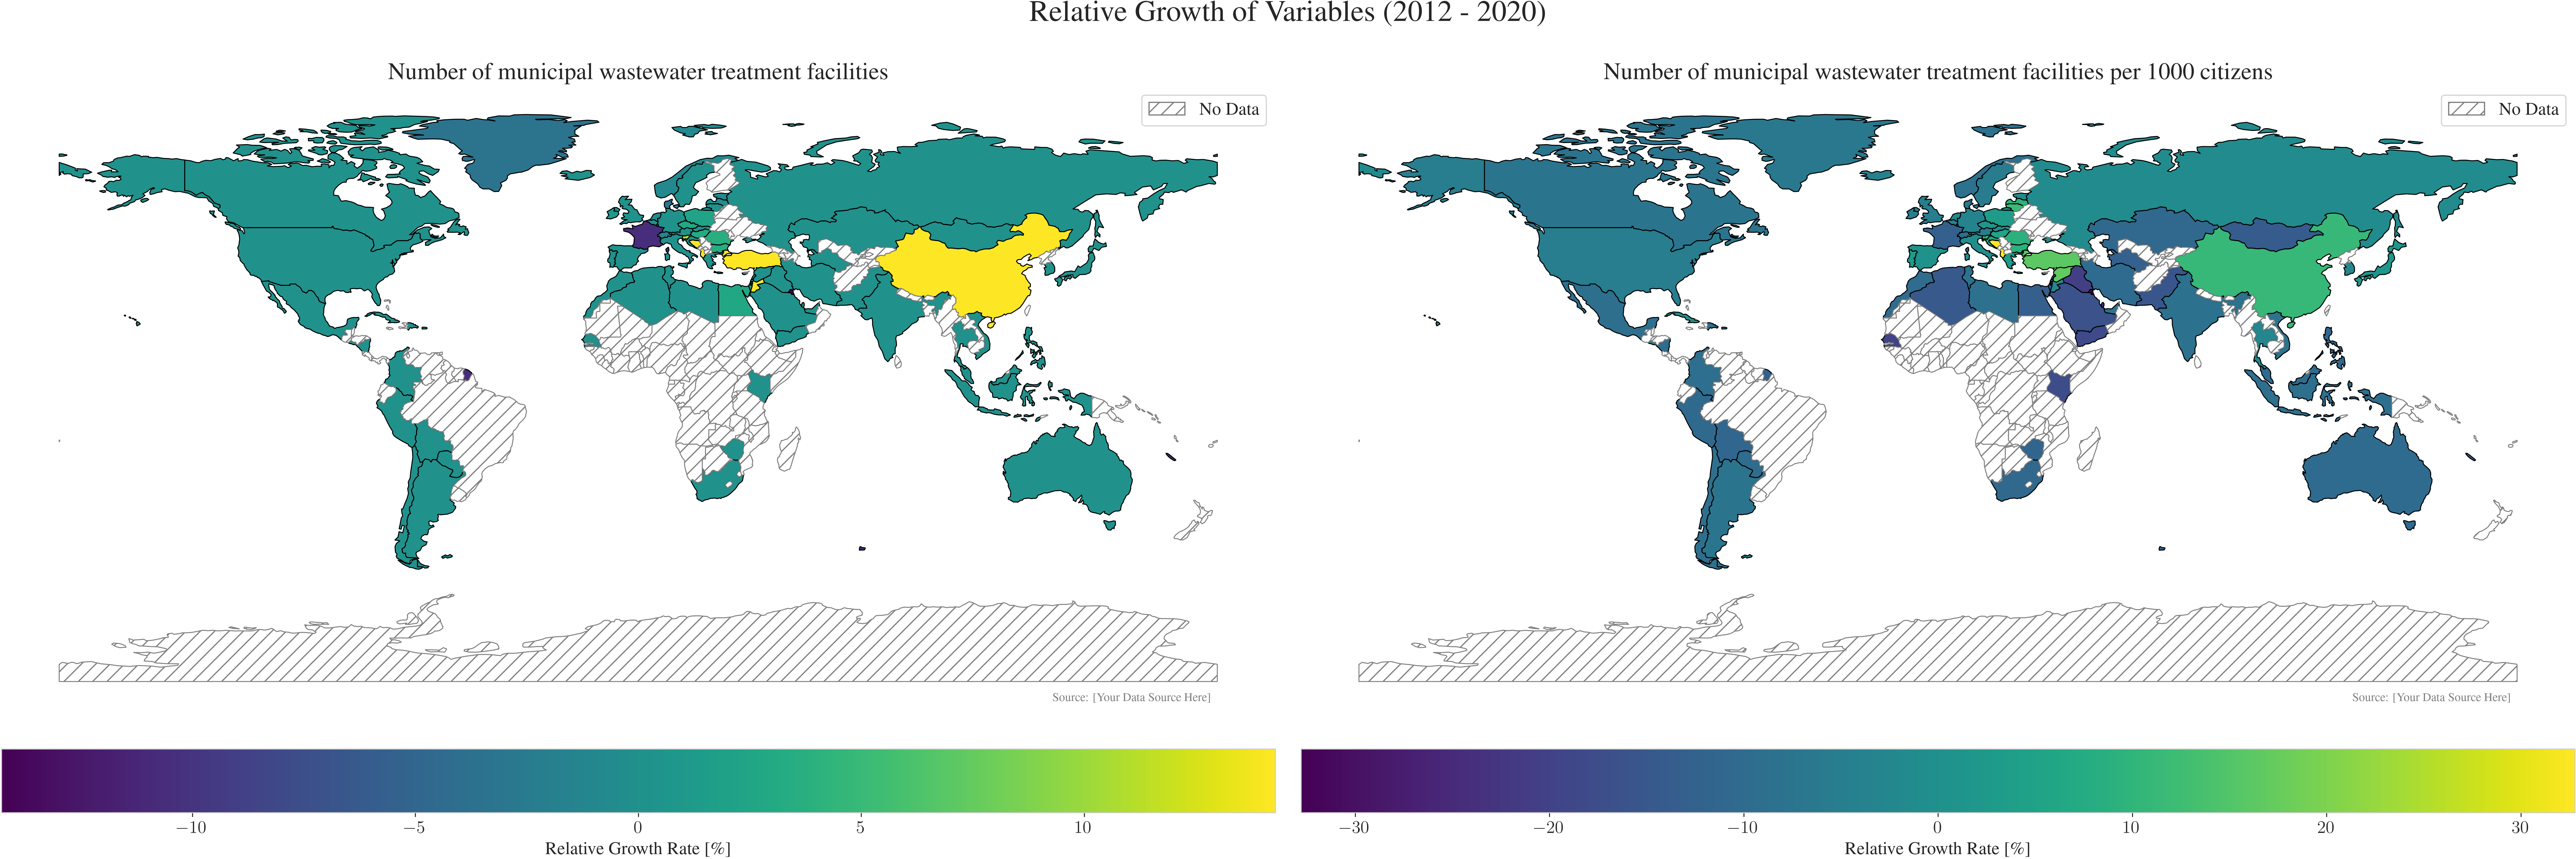

In [235]:
plot_growth_rates_m(
    waste_df,
    ['Number of municipal wastewater treatment facilities', 'Number of municipal wastewater treatment facilities per 1000 citizens'],
    'viridis',
)

Saving figure to fig\water_management\fig_growth_rate_Number_of_municipal_wastewater_treatment_facilities.pdf ... Done!


(<Figure size 4500x3000 with 2 Axes>,
 [<Axes: title={'center': 'Relative Growth of Total Number of Municipal Wastewater Treatment Facilities (2012 - 2020)'}>])

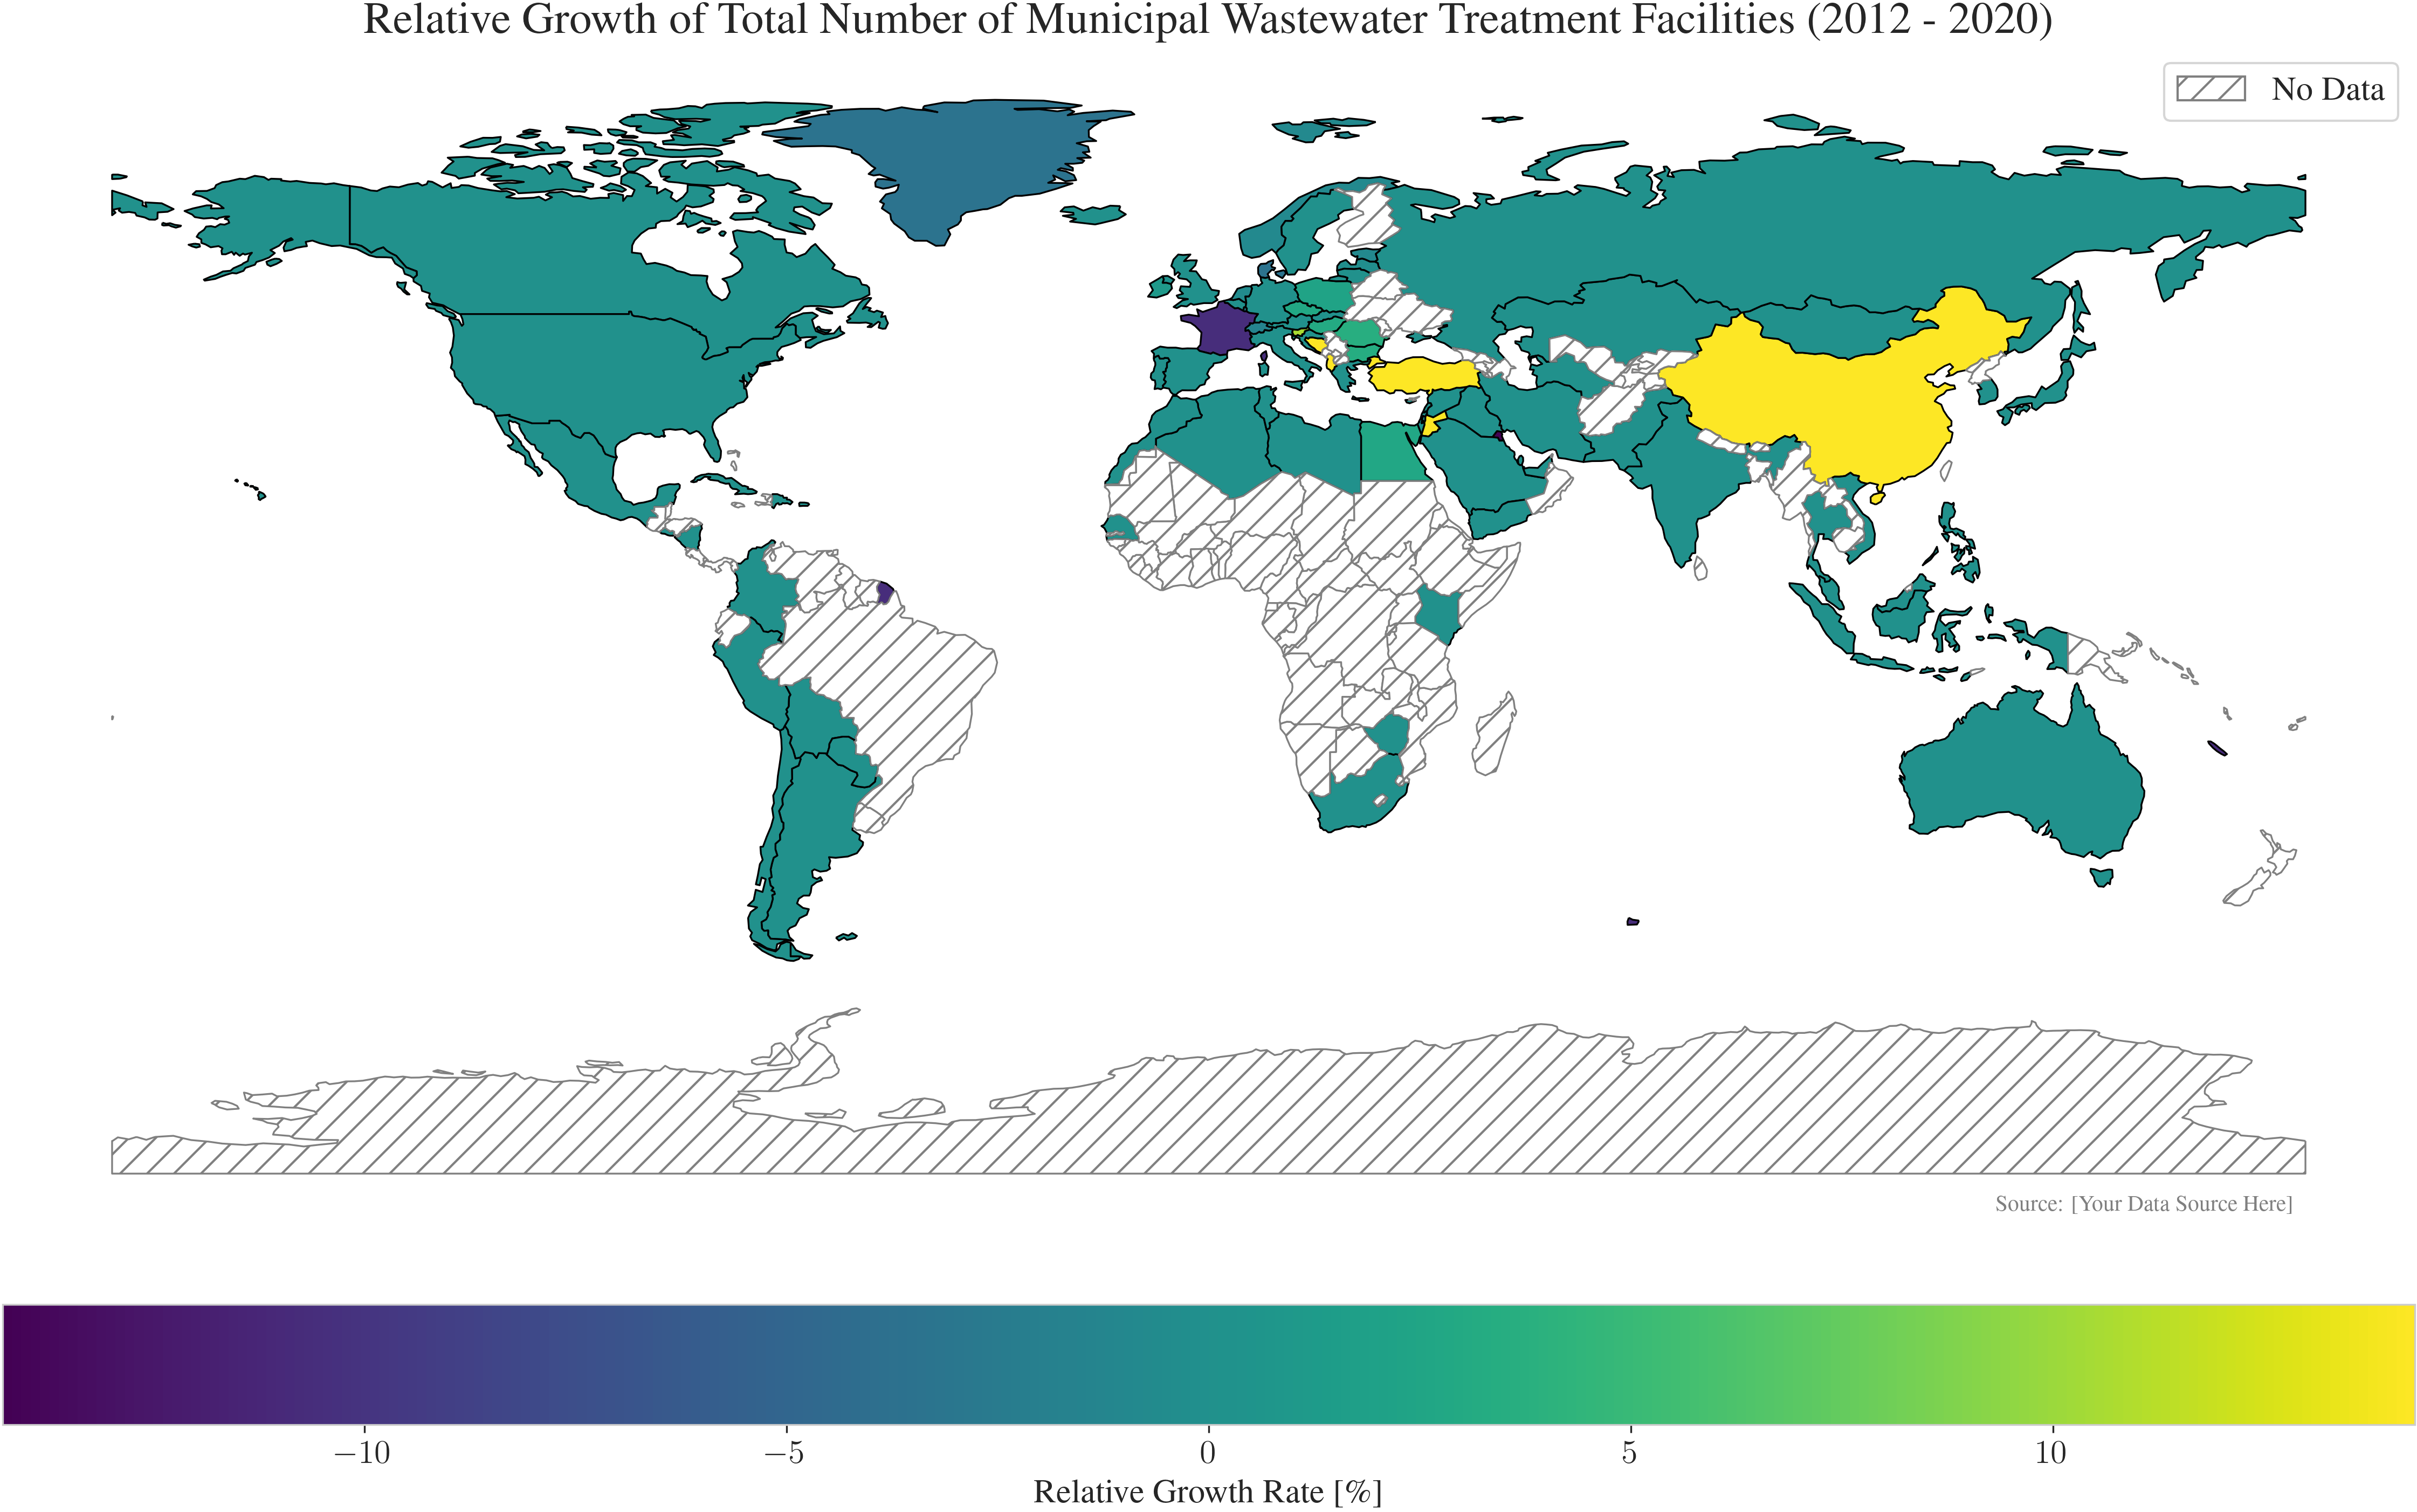

In [194]:
plot_growth_rates_m(
    waste_df,
    'Number of municipal wastewater treatment facilities',
    'viridis',
    'Total Number of Municipal Wastewater Treatment Facilities'
)

It's odd to see that so many countries have a negative (redish) or a stagnant (dark grey) growth rate which means they stopped building facilities in the last years. Is there a reason for that? Maybe the water stress did not increase in these countries?

Water stress (SDG 6.4.2) is defined as the ratio of total water withdrawals to available renewable freshwater resources.

In [195]:
# Filter interesting variables
filter_for = ['stress']

filtered_columns = [column for column in aquastat_df.columns if any([x in column.lower() for x in filter_for])]
filtered_columns

['SDG 6.4.2. Water Stress']

In [196]:
# Plot the water quality for each country
# The countries that have a negative slope and a bad water quality, are the ones we are interested in

# Create a new dataframe with only the columns we are interested in
interesting_var = 'SDG 6.4.2. Water Stress'

stress_df = aquastat_df[['Country', 'Year', interesting_var]]
stress_df = stress_df.dropna()  # Drop rows with missing values
stress_df = stress_df.sort_values(by=interesting_var, ascending=False)  # Sort by number of facilities

stress_df

Variable                Country  Year  SDG 6.4.2. Water Stress
5044                     Kuwait  2018              3850.500000
5046                     Kuwait  2020              3850.500000
5045                     Kuwait  2019              3850.500000
5043                     Kuwait  2017              3850.500000
5042                     Kuwait  2016              3575.000000
...                         ...   ...                      ...
2081      Republic of the Congo  1991                 0.024821
2080      Republic of the Congo  1990                 0.024582
2079      Republic of the Congo  1989                 0.024344
2078      Republic of the Congo  1988                 0.024105
2077      Republic of the Congo  1987                 0.023866

[5844 rows x 3 columns]

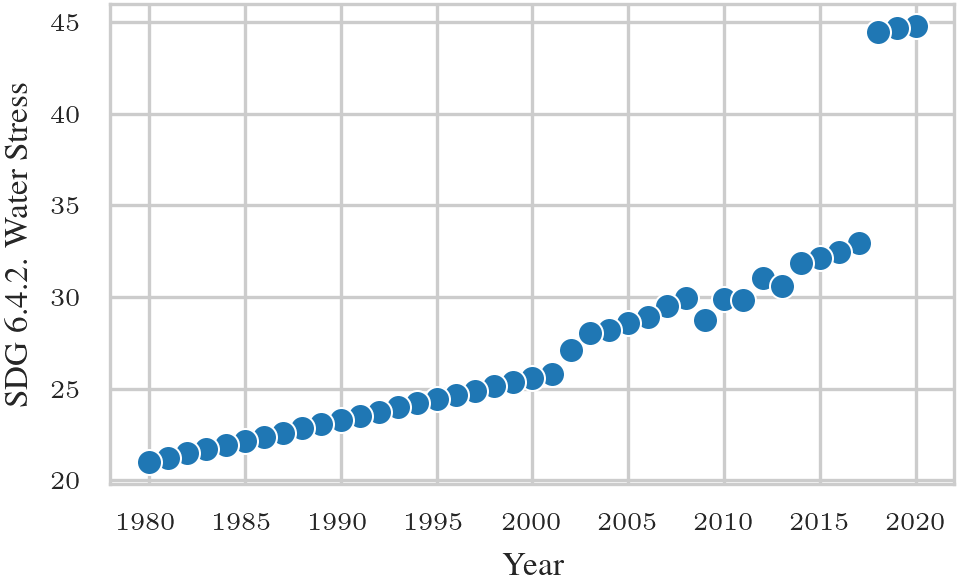

In [197]:
'''Just for testing'''
sns.scatterplot(data=stress_df[stress_df['Country'] == 'Mexico'], x='Year',
                y='SDG 6.4.2. Water Stress')
plt.show()

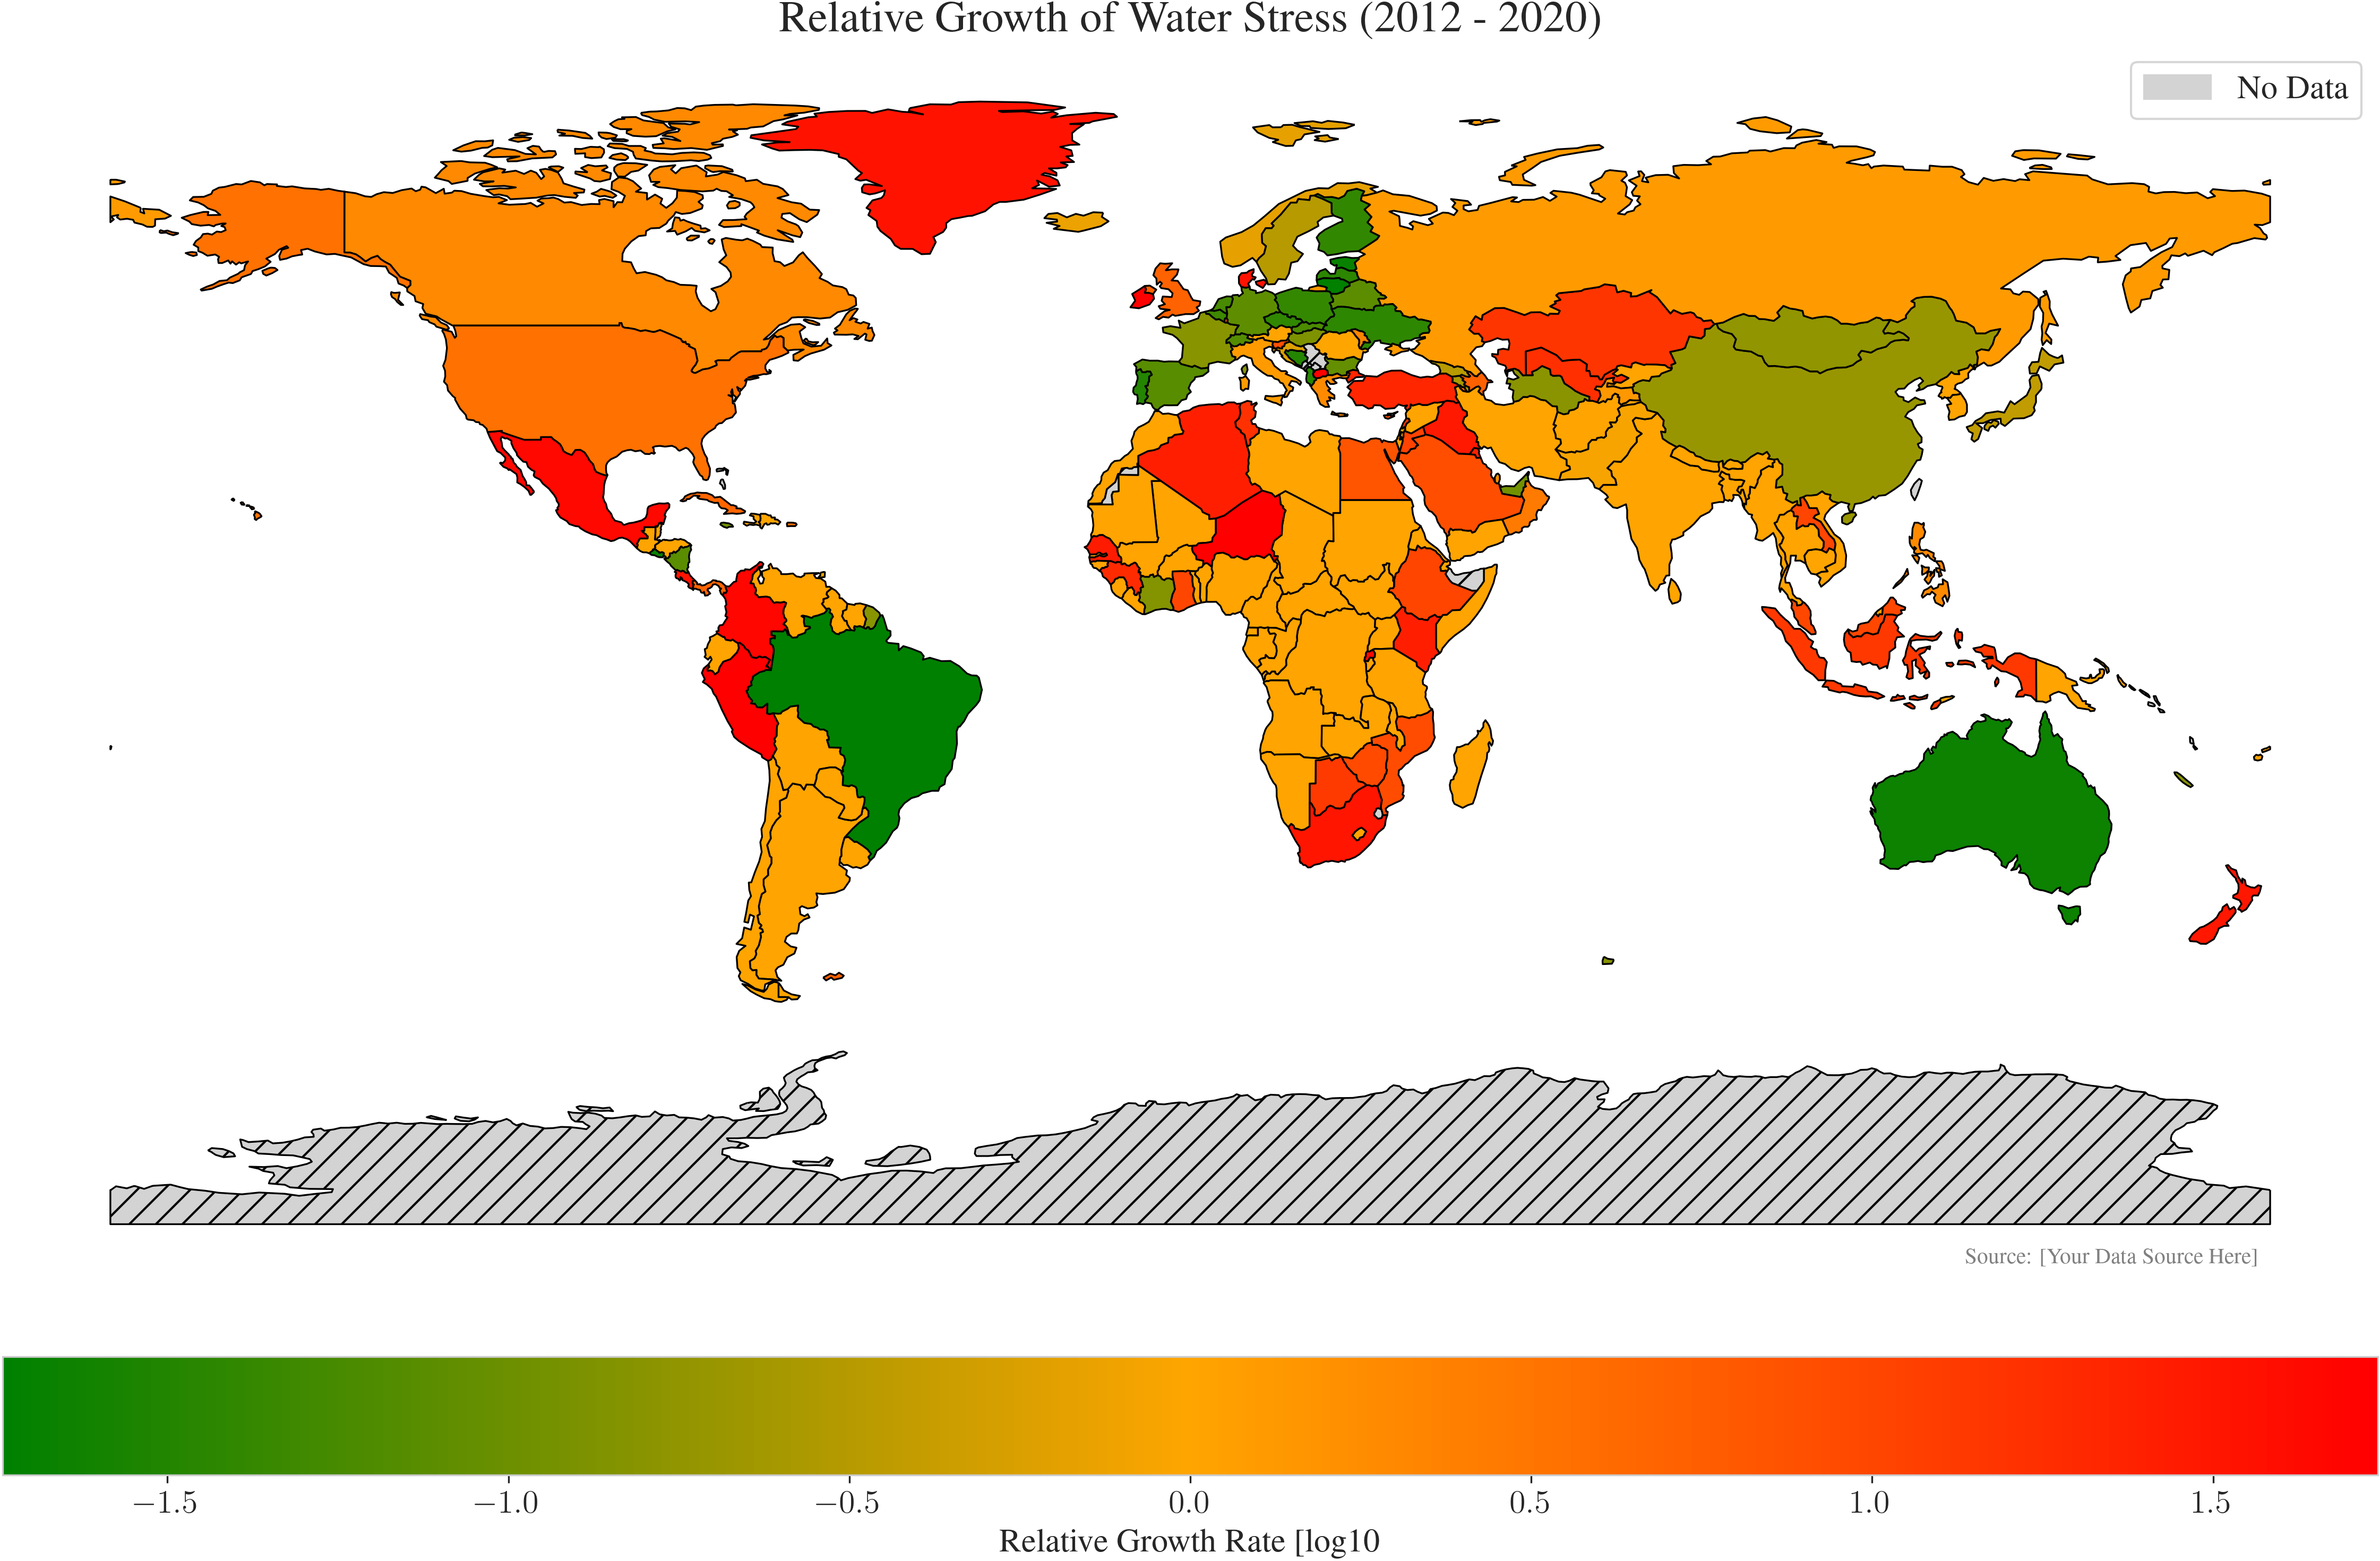

Saving figure to fig\water_management\fig_growth_rate_SDG_6.4.2._Water_Stress.pdf ... Done!


(<Figure size 4500x3000 with 2 Axes>,
 <Axes: title={'center': 'Relative Growth of Water Stress (2012 - 2020)'}>)

In [198]:
plot_growth_rates(
    stress_df,
    'SDG 6.4.2. Water Stress',
    rog_cmap,
    'Water Stress',
    log_scale=True
)

it could be also interesting to look how their wastewater output has changed.

In [199]:
# Create a new dataframe with only the columns we are interested in
interesting_var = 'Produced municipal wastewater'

wwater_df = aquastat_df[['Country', 'Year', interesting_var]]
wwater_df = wwater_df.dropna()  # Drop rows with missing values
wwater_df = wwater_df.sort_values(by=interesting_var, ascending=False)  # Sort by number of facilities

wwater_df

Variable                   Country  Year  Produced municipal wastewater
2614                       Denmark  2011                       364.4770
2615                       Denmark  2012                       363.8300
2616                       Denmark  2013                       360.8530
2617                       Denmark  2014                       353.6670
10143     United States of America  2020                        60.4100
...                            ...   ...                            ...
6041                     Mauritius  2016                         0.0006
6043                     Mauritius  2018                         0.0006
6044                     Mauritius  2019                         0.0006
6045                     Mauritius  2020                         0.0006
6042                     Mauritius  2017                         0.0006

[2513 rows x 3 columns]

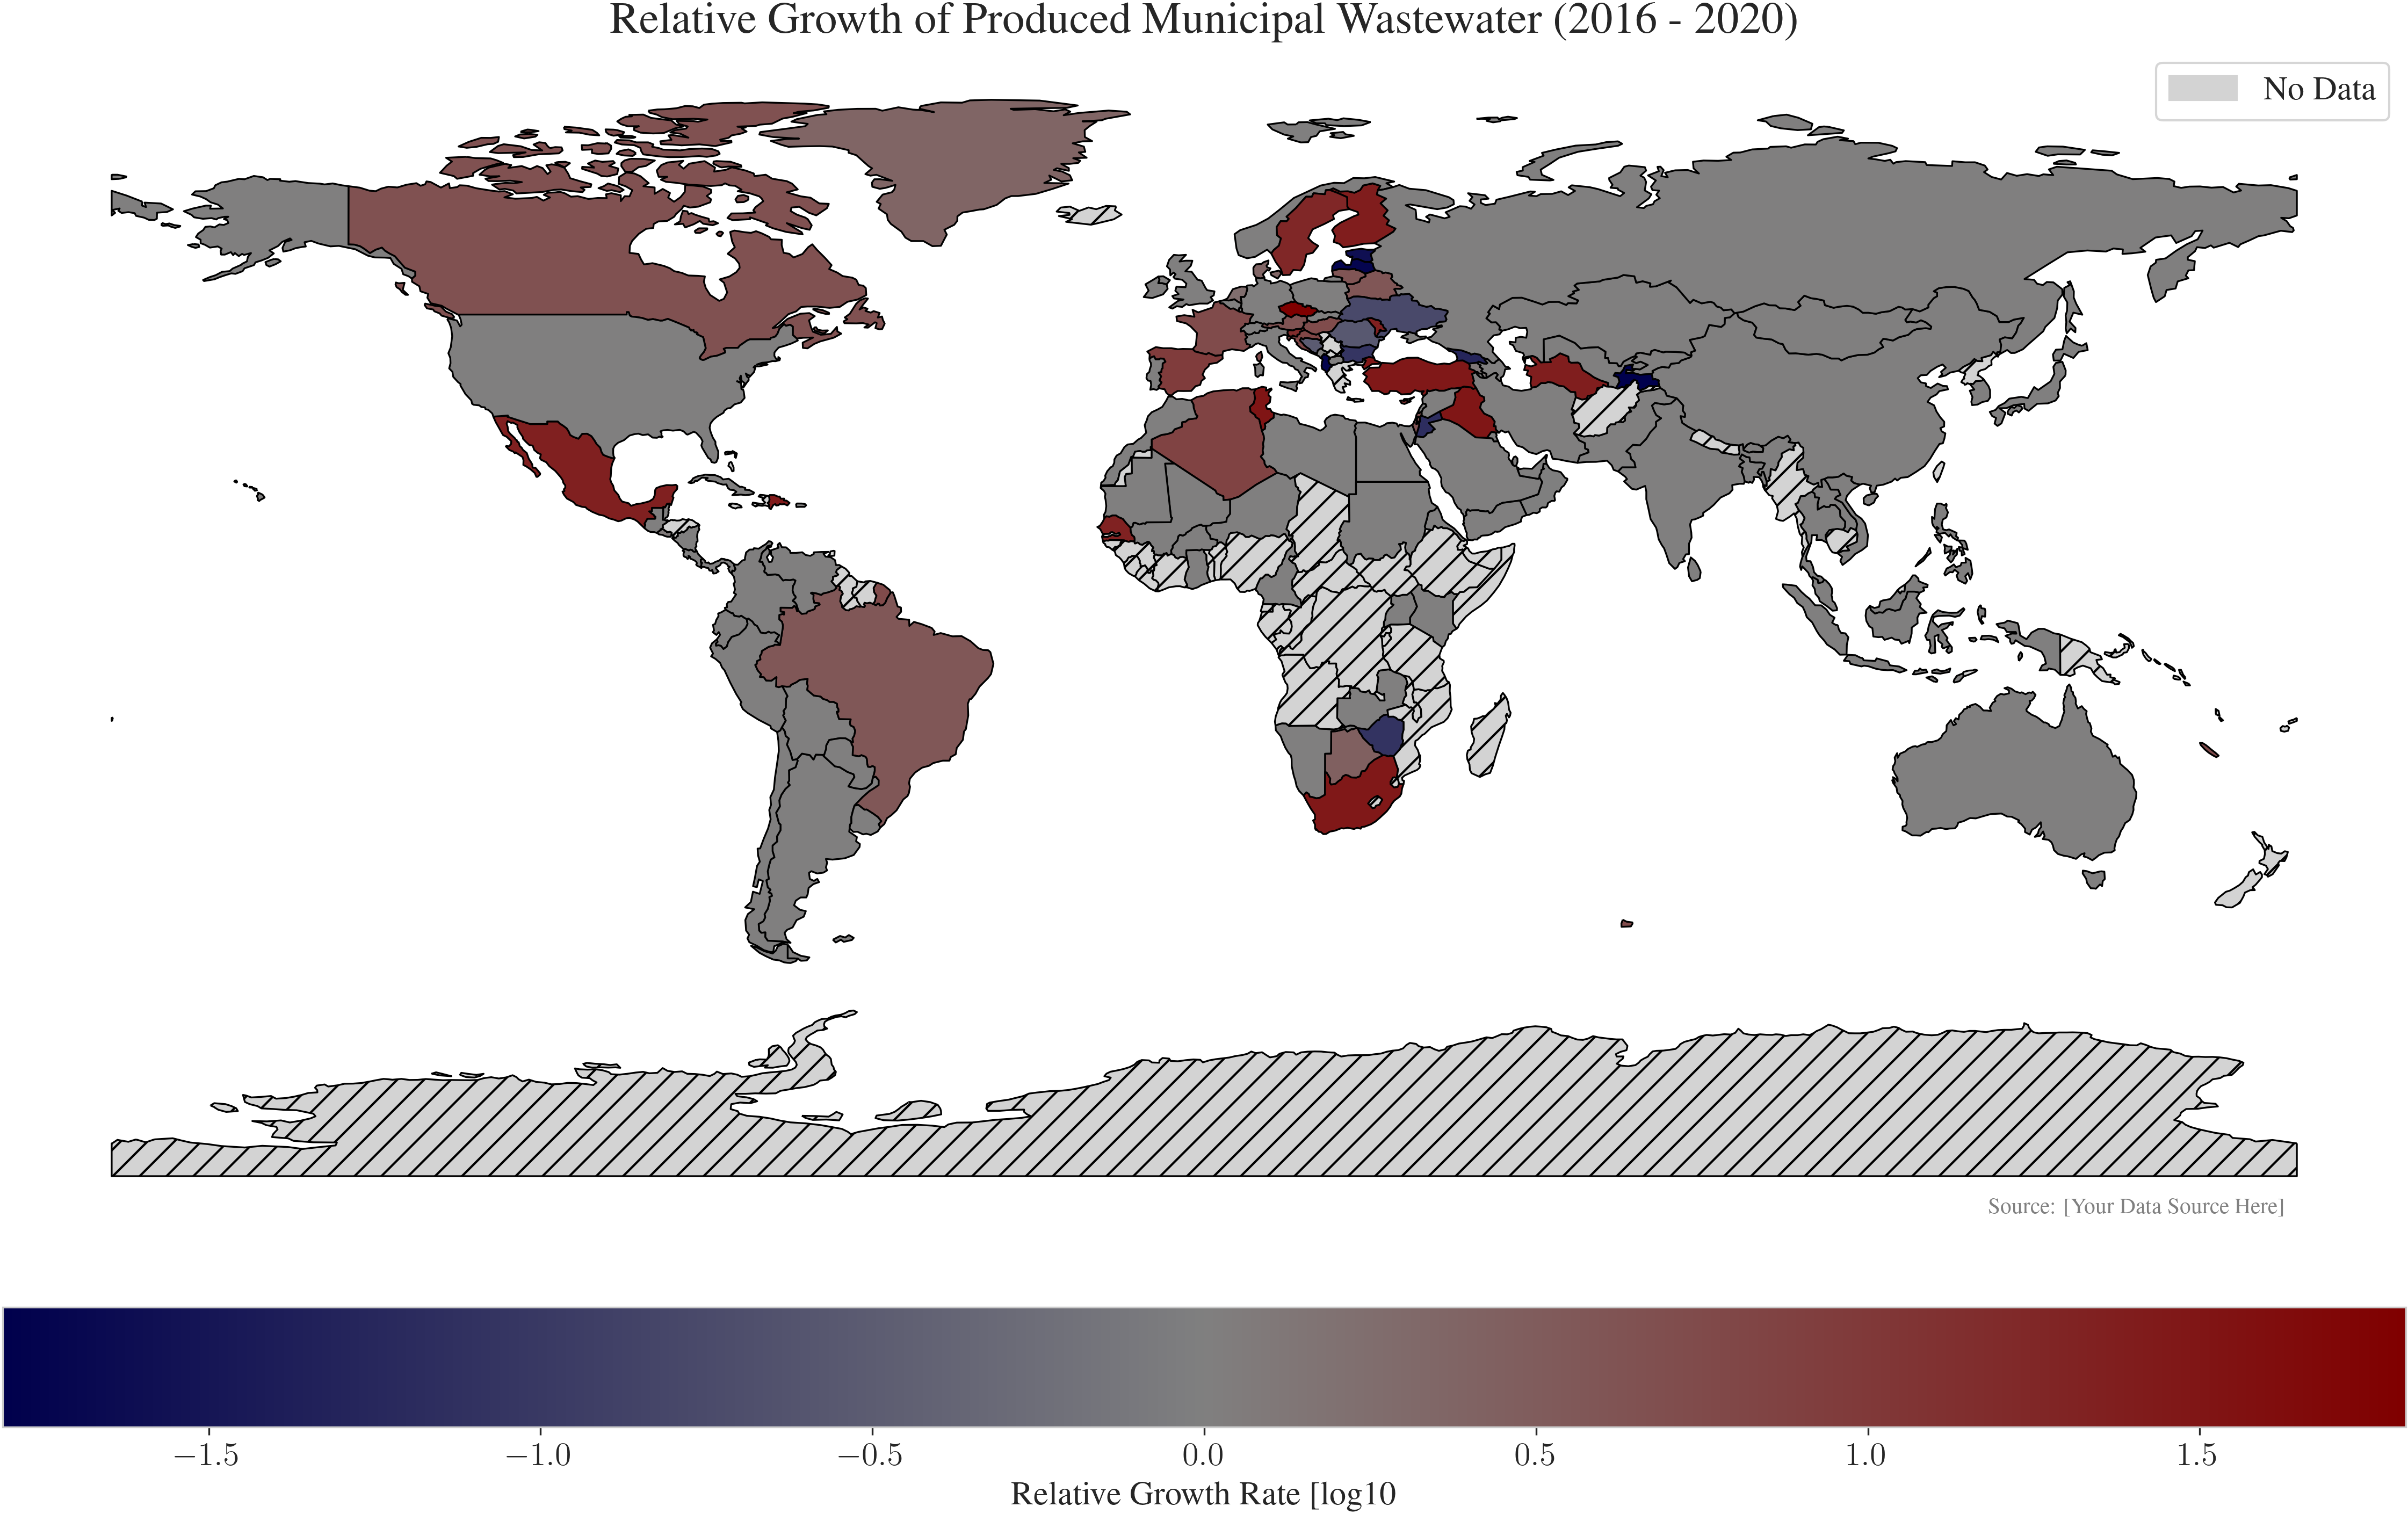

Saving figure to fig\water_management\fig_growth_rate_Produced_municipal_wastewater.pdf ... Done!


(<Figure size 4500x3000 with 2 Axes>,
 <Axes: title={'center': 'Relative Growth of Produced Municipal Wastewater (2016 - 2020)'}>)

In [200]:
plot_growth_rates(
    wwater_df,
    interesting_var,
    wastewater_cmap,
    'Produced Municipal Wastewater',
    log_scale=True
)

What we see is that most countries don't face a change in produced waste water.

In [201]:
# Prepare the DataFrame with wastewater information
def get_data_by_continent(aquastat_df: pd.DataFrame, variable: str):
    data = aquastat_df[['Country', 'Year', variable]]
    data = data.dropna()

    # Load the world map GeoDataFrame
    world = gpd.read_file(to_dat_path(file_path='naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")

    # Join the data with the world map
    combined_data = world.merge(data, left_on='SOVEREIGNT', right_on='Country')

    # Drop unnecessary columns
    combined_data = combined_data[['CONTINENT', 'Year', variable, 'POP_EST']]

    # Group by 'CONTINENT' and 'Year', then sum the numeric data
    grouped_data = combined_data.groupby(['CONTINENT', 'Year']).sum()

    # Normalize by land area
    grouped_data[variable]  #/= grouped_data['POP_EST']

    # Reset index to turn 'CONTINENT' and 'Year' into columns
    grouped_data = grouped_data.reset_index()

    # Aggregate the geometric data by 'CONTINENT' using dissolve
    geometric_data = world.dissolve(by='CONTINENT').reset_index()

    # Merge the aggregated numeric data back with the geometric data
    final_data = geometric_data.merge(grouped_data, on='CONTINENT')

    # Keep only the required columns
    data = final_data[['CONTINENT', 'Year', 'geometry', variable]]
    return data



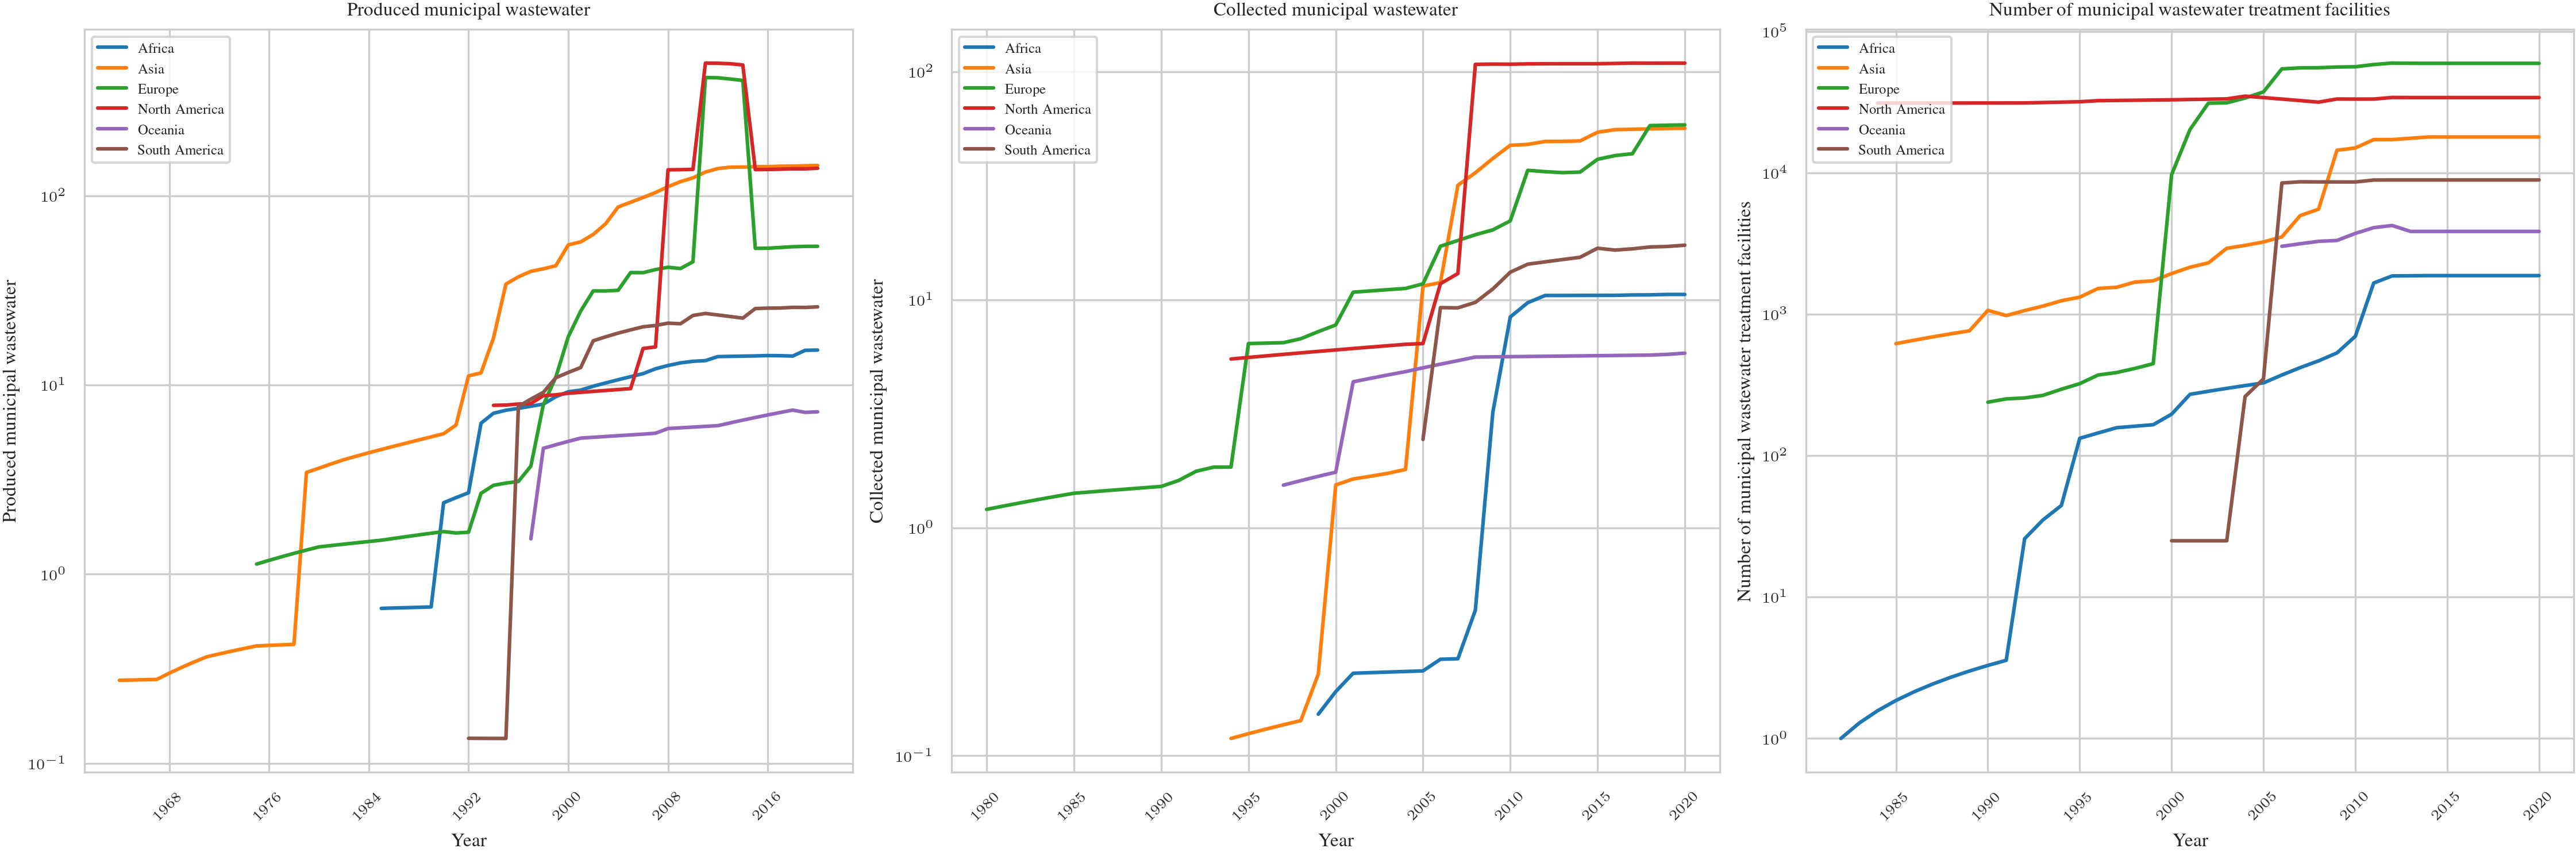

In [202]:
# Create 3 plots: Production, Collection, Treatment

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Produced municipal wastewater
# Remove the 'Seven seas (open ocean)' continent
produced_municipal_wastewater = get_data_by_continent(aquastat_df, 'Produced municipal wastewater')
produced_municipal_wastewater = produced_municipal_wastewater[
    produced_municipal_wastewater['CONTINENT'] != 'Seven seas (open ocean)']
# Plot the data with a logarithmic scale
sns.lineplot(data=produced_municipal_wastewater, x='Year', y='Produced municipal wastewater', hue='CONTINENT',
             ax=axs[0])

# Axes settings
axs[0].set_yscale('log')
axs[0].set_ylabel('Produced municipal wastewater')
axs[0].set_title('Produced municipal wastewater')
axs[0].legend(loc='upper left')
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(10))

# Plot 2: Collected municipal wastewater
collected_municipal_wastewater = get_data_by_continent(aquastat_df, 'Collected municipal wastewater')
collected_municipal_wastewater = collected_municipal_wastewater[
    collected_municipal_wastewater['CONTINENT'] != 'Seven seas (open ocean)']
# Plot the data with a logarithmic scale
sns.lineplot(data=collected_municipal_wastewater, x='Year', y='Collected municipal wastewater', hue='CONTINENT',
             ax=axs[1])

# Axes settings
axs[1].set_yscale('log')
axs[1].set_ylabel('Collected municipal wastewater')
axs[1].set_title('Collected municipal wastewater')
axs[1].legend(loc='upper left')
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(10))

# Plot 3: Number of municipal wastewater treatment facilities
number_of_municipal_wastewater_treatment_facilities = get_data_by_continent(aquastat_df,
                                                                            'Number of municipal wastewater treatment facilities')
number_of_municipal_wastewater_treatment_facilities = number_of_municipal_wastewater_treatment_facilities[
    number_of_municipal_wastewater_treatment_facilities['CONTINENT'] != 'Seven seas (open ocean)']
# Plot the data with a logarithmic scale
sns.lineplot(data=number_of_municipal_wastewater_treatment_facilities, x='Year',
             y='Number of municipal wastewater treatment facilities', hue='CONTINENT', ax=axs[2])

# Axes settings
axs[2].set_yscale('log')
axs[2].set_ylabel('Number of municipal wastewater treatment facilities')
axs[2].set_title('Number of municipal wastewater treatment facilities')
axs[2].legend(loc='upper left')
axs[2].xaxis.set_tick_params(rotation=45)
axs[2].xaxis.set_major_locator(plt.MaxNLocator(10))